# Import libraries and read data

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [11]:
# data = pd.read_csv("a1_b1_c1.csv")
data = pd.read_csv("a1_b1_c2.csv")
# data = pd.read_csv("a1_b2_c1.csv")
# data = pd.read_csv("a1_b2_c2.csv")

# Train test split

In [12]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Prediction with Decision tree

Train Accuracy score: 0.98000
Train ROC score: 0.96774
Test Accuracy score: 0.97000
Test ROC score: 0.94231


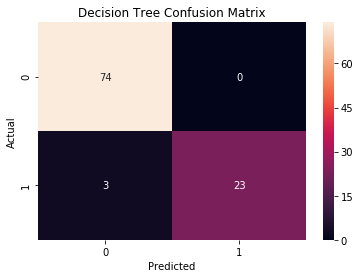

Stored 'confuse_dt' (ndarray)


In [13]:
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state=1)
clf.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = clf.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = clf.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse_dt = confusion_matrix(y_test, y_pred_test)
confuse_dt
fig = plt.figure()
sns.heatmap(confuse_dt, annot = True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# store best results for decision tree
%store confuse_dt

# Visualize tree model

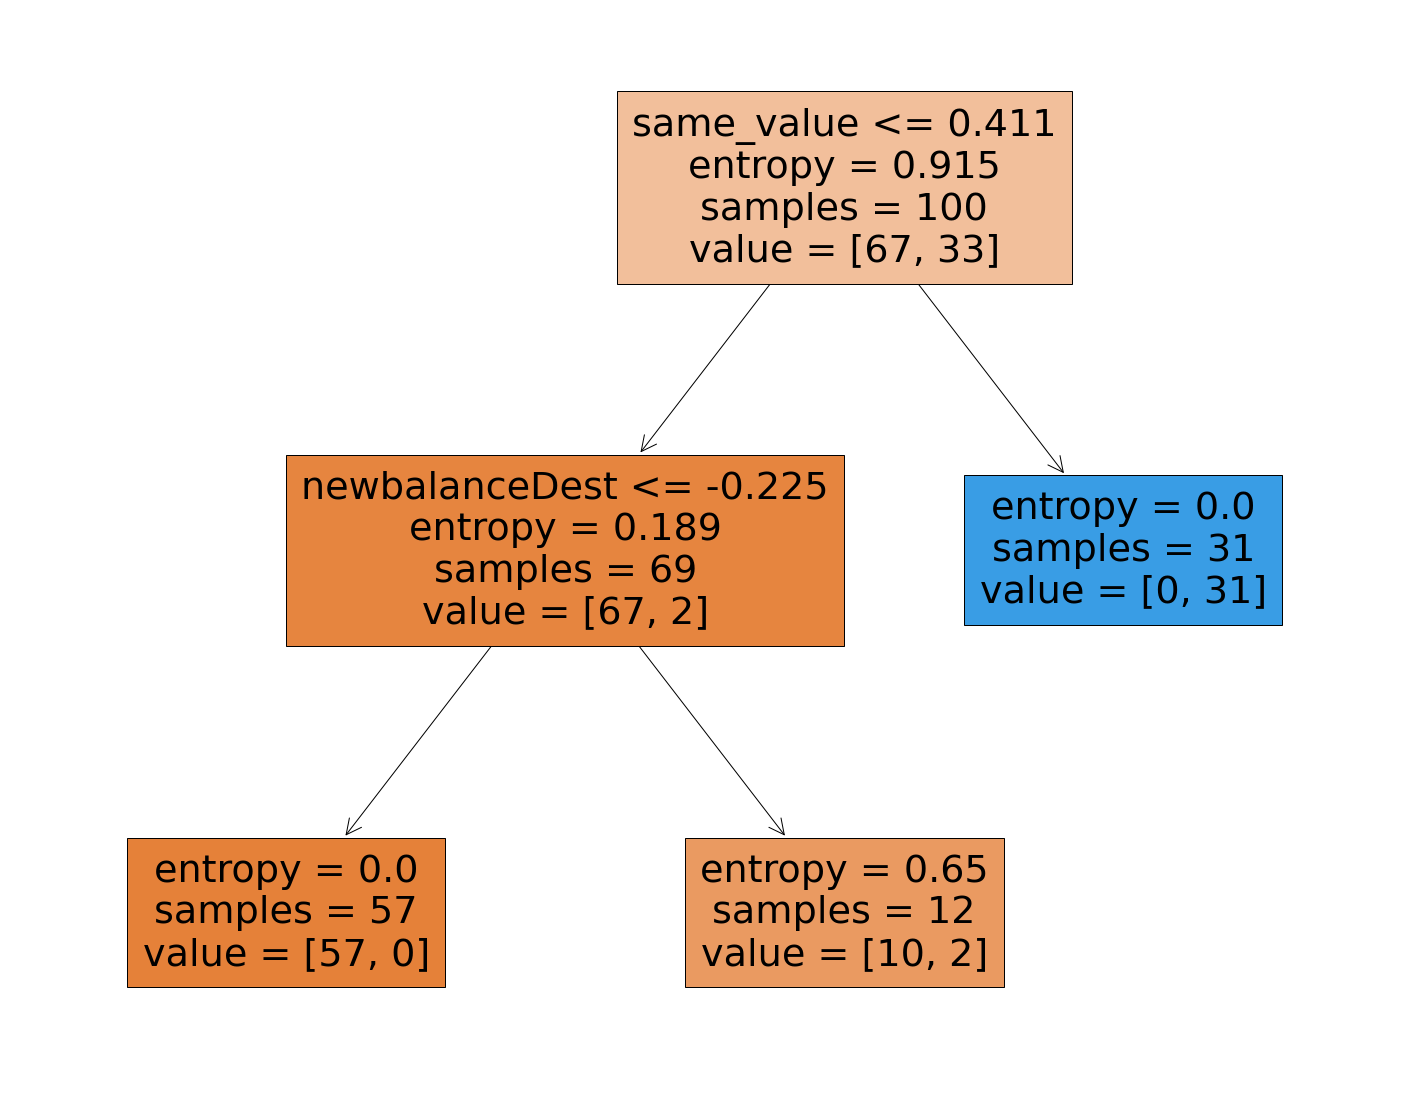

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'same_value', 'type_label'],
                   filled=True)

# GridSearchCV

In [14]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier() 

# Define hyperparameters and grid search
param_grid = { 
    'criterion': ['gini','entropy'],
    'max_depth' : [1,2,3,4,5]

}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

Wall time: 159 ms


{'criterion': 'entropy', 'max_depth': 3}

In [15]:
# find best score
grid_search.best_score_

0.99

In [16]:
# find best parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [17]:
# Get search results and put in dataframe
df = pd.DataFrame(grid_search.cv_results_)
df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001386,0.000657,0.000596,0.000486,gini,1,"{'criterion': 'gini', 'max_depth': 1}",1.0,0.95122,0.97561,0.95122,0.975,1.0,1.0,1.0,1.0,0.948718,0.9800,0.021626,6
1,0.000902,0.000548,0.000397,0.000486,gini,2,"{'criterion': 'gini', 'max_depth': 2}",1.0,0.95122,0.95122,0.97561,0.975,1.0,1.0,1.0,1.0,0.948718,0.9800,0.021626,6
2,0.000899,0.000541,0.000200,0.000400,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.0,0.95122,0.95122,0.97561,0.975,1.0,1.0,1.0,1.0,0.948718,0.9800,0.021626,6
3,0.000896,0.000299,0.000399,0.000489,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.0,0.95122,0.95122,1.00000,0.975,1.0,1.0,1.0,1.0,0.974359,0.9850,0.019733,4
4,0.000994,0.000010,0.000299,0.000457,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.0,0.95122,0.95122,1.00000,1.000,1.0,1.0,1.0,1.0,0.974359,0.9875,0.019891,2
5,0.000698,0.000457,0.000399,0.000488,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",1.0,0.95122,0.97561,0.95122,0.975,1.0,1.0,1.0,1.0,0.948718,0.9800,0.021626,6
6,0.000898,0.000299,0.000299,0.000457,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",1.0,0.95122,0.97561,0.95122,0.975,1.0,1.0,1.0,1.0,0.948718,0.9800,0.021626,6
7,0.000898,0.000299,0.000299,0.000457,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",1.0,0.95122,0.97561,1.00000,1.000,1.0,1.0,1.0,1.0,0.974359,0.9900,0.016401,1
8,0.000798,0.000399,0.000299,0.000457,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",1.0,0.95122,0.95122,1.00000,1.000,1.0,1.0,1.0,1.0,0.974359,0.9875,0.019891,2
9,0.000897,0.000299,0.000100,0.000299,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",1.0,0.95122,0.95122,1.00000,0.975,1.0,1.0,1.0,1.0,0.974359,0.9850,0.019733,4


In [ ]:
# save search results
df.to_csv('DT_cv_result.csv')